In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context("poster")

%matplotlib inline

In [2]:
def convert_to_s(hours: int, minutes: int, seconds: int) -> int:
    return (hours * 3600) + (minutes * 60) + seconds

In [4]:
n_loci = 1733646
runtimes = {
    "label": ["ConSTRain\n(32 threads)", "ConSTRain\n(single thread)", "GangSTR", "HipSTR"],
    "tool": ["ConSTRain", "ConSTRain", "GangSTR", "HipSTR"],
    "seconds": [convert_to_s(0, 19, 31), convert_to_s(6, 44, 7), convert_to_s(14, 54, 23), convert_to_s(11, 59, 36)]
}

df = pd.DataFrame(runtimes).assign(
    hours = lambda x: x["seconds"] / 3600,
    loci_per_sec = lambda x: n_loci / x["seconds"]
)
df

,label,tool,seconds,hours,loci_per_sec
0,ConSTRain\n(32 threads),ConSTRain,1171,0.325278,1480.483348
1,ConSTRain\n(single thread),ConSTRain,24247,6.735278,71.499402
2,GangSTR,GangSTR,53663,14.906389,32.306170
3,HipSTR,HipSTR,43176,11.993333,40.153002


In [4]:
24247 / 1171

20.706233988044406

In [6]:
print(53663 / 24247)
print(43176 / 24247)

print(53663 / 1171)
print(43176 / 1171)

2.213181012083969
1.78067389780179
45.8266438941076
36.87105038428693


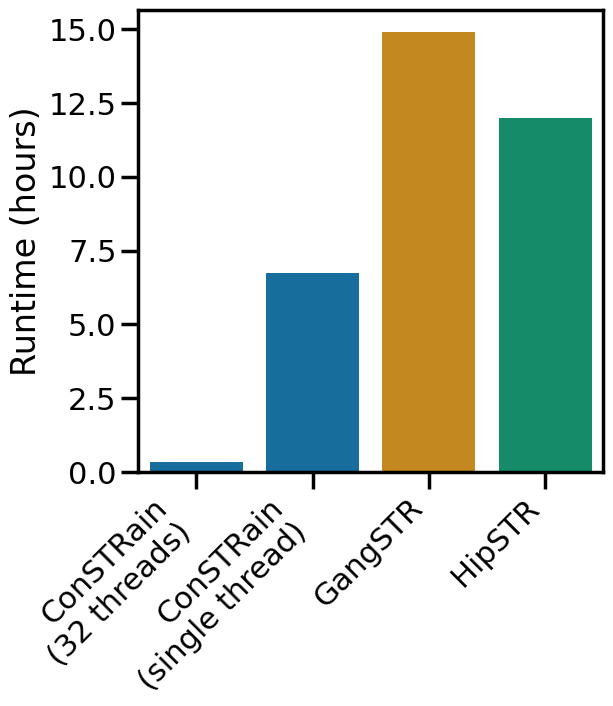

In [10]:
fig = plt.figure(figsize=(6, 6))

ax = sns.barplot(
    df,
    x="label",
    y="hours",
    hue="tool",
    palette="colorblind",
    legend=False
)

_ = ax.set(
    xlabel = "",
    ylabel = "Runtime (hours)")

_ = ax.set_xticks(
    ax.get_xticks(), 
    ax.get_xticklabels(), 
    rotation=45, 
    ha='right'
)

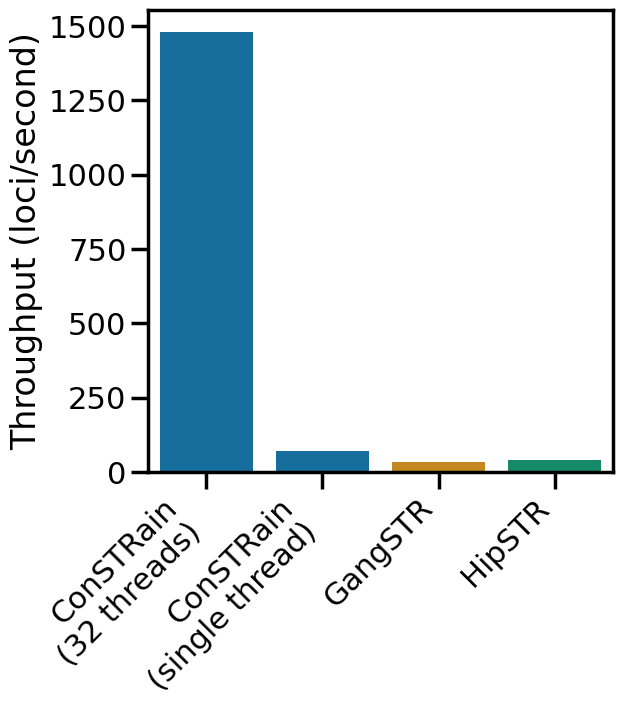

In [9]:
fig = plt.figure(figsize=(6, 6))

ax = sns.barplot(
    df,
    x="label",
    y="loci_per_sec",
    hue="tool",
    palette="colorblind",
    legend=False
)

_ = ax.set(
    xlabel = "",
    ylabel = "Throughput (loci/second)")

_ = ax.set_xticks(
    ax.get_xticks(), 
    ax.get_xticklabels(), 
    rotation=45, 
    ha='right'
)

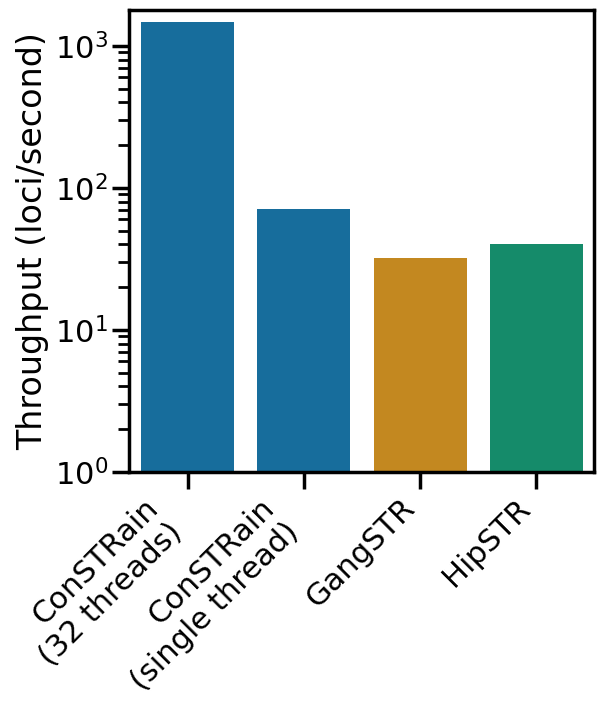

In [20]:
fig = plt.figure(figsize=(6, 6))

ax = sns.barplot(
    df,
    x="label",
    y="loci_per_sec",
    hue="tool",
    palette="colorblind",
    legend=False
)

_ = ax.set(
    xlabel = "",    
    ylabel = "Throughput (loci/second)",
    yscale = "log",
    ylim = (1, None),
)

_ = ax.set_xticks(
    ax.get_xticks(), 
    ax.get_xticklabels(), 
    rotation=45, 
    ha='right'
)